In [1]:
import numpy as np
import pandas as pd

In [2]:
train_ds = pd.read_csv("train.csv", na_filter=False)

In [3]:
train_ds

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,FALSE,B/0/P,TRAPPIST-1e,39,FALSE,0,0,0,0,0,Maham Ofracculy,False
1,0002_01,Earth,FALSE,F/0/S,TRAPPIST-1e,24,FALSE,109,9,25,549,44,Juanna Vines,True
2,0003_01,Europa,FALSE,A/0/S,TRAPPIST-1e,58,TRUE,43,3576,0,6715,49,Altark Susent,False
3,0003_02,Europa,FALSE,A/0/S,TRAPPIST-1e,33,FALSE,0,1283,371,3329,193,Solam Susent,False
4,0004_01,Earth,FALSE,F/1/S,TRAPPIST-1e,16,FALSE,303,70,151,565,2,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,FALSE,A/98/P,55 Cancri e,41,TRUE,0,6819,0,1643,74,Gravior Noxnuther,False
8689,9278_01,Earth,TRUE,G/1499/S,PSO J318.5-22,18,FALSE,0,0,0,0,0,Kurta Mondalley,False
8690,9279_01,Earth,FALSE,G/1500/S,TRAPPIST-1e,26,FALSE,0,0,1872,1,0,Fayey Connon,True
8691,9280_01,Europa,FALSE,E/608/S,55 Cancri e,32,FALSE,0,1049,0,353,3235,Celeon Hontichre,False


In [4]:
train_ds.info

<bound method DataFrame.info of      PassengerId HomePlanet CryoSleep     Cabin    Destination Age    VIP  \
0        0001_01     Europa     FALSE     B/0/P    TRAPPIST-1e  39  FALSE   
1        0002_01      Earth     FALSE     F/0/S    TRAPPIST-1e  24  FALSE   
2        0003_01     Europa     FALSE     A/0/S    TRAPPIST-1e  58   TRUE   
3        0003_02     Europa     FALSE     A/0/S    TRAPPIST-1e  33  FALSE   
4        0004_01      Earth     FALSE     F/1/S    TRAPPIST-1e  16  FALSE   
...          ...        ...       ...       ...            ...  ..    ...   
8688     9276_01     Europa     FALSE    A/98/P    55 Cancri e  41   TRUE   
8689     9278_01      Earth      TRUE  G/1499/S  PSO J318.5-22  18  FALSE   
8690     9279_01      Earth     FALSE  G/1500/S    TRAPPIST-1e  26  FALSE   
8691     9280_01     Europa     FALSE   E/608/S    55 Cancri e  32  FALSE   
8692     9280_02     Europa     FALSE   E/608/S    TRAPPIST-1e  44  FALSE   

     RoomService FoodCourt ShoppingMall   S

In [5]:
train_ds.corr()

,Transported
Transported,1.0


<AxesSubplot:>

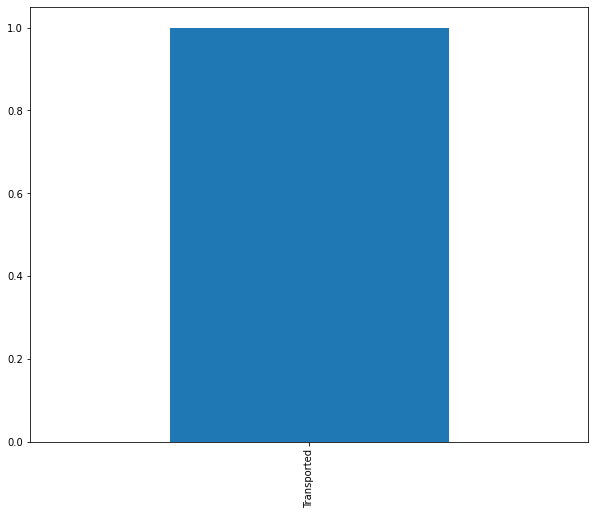

In [6]:
train_ds.corrwith(train_ds['Transported']).sort_values(ascending=False).plot(kind='bar', figsize=(10, 8))

In [7]:
lis = ['PassengerId', 'FoodCourt','Name', 'VIP', 'ShoppingMall']
for i in lis:
    train_ds = train_ds.drop(columns=i)
train_ds

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,Spa,VRDeck,Transported
0,Europa,FALSE,B/0/P,TRAPPIST-1e,39,0,0,0,False
1,Earth,FALSE,F/0/S,TRAPPIST-1e,24,109,549,44,True
2,Europa,FALSE,A/0/S,TRAPPIST-1e,58,43,6715,49,False
3,Europa,FALSE,A/0/S,TRAPPIST-1e,33,0,3329,193,False
4,Earth,FALSE,F/1/S,TRAPPIST-1e,16,303,565,2,True
...,...,...,...,...,...,...,...,...,...
8688,Europa,FALSE,A/98/P,55 Cancri e,41,0,1643,74,False
8689,Earth,TRUE,G/1499/S,PSO J318.5-22,18,0,0,0,False
8690,Earth,FALSE,G/1500/S,TRAPPIST-1e,26,0,1,0,True
8691,Europa,FALSE,E/608/S,55 Cancri e,32,0,353,3235,False


In [8]:
train_ds.isnull().mean()

HomePlanet     0.0
CryoSleep      0.0
Cabin          0.0
Destination    0.0
Age            0.0
RoomService    0.0
Spa            0.0
VRDeck         0.0
Transported    0.0
dtype: float64

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
for i in train_ds.columns:
    train_ds[i] = le.fit_transform(train_ds[i])

In [12]:
train_ds

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,Spa,VRDeck,Transported
0,2,1,150,3,34,1,1,1,0
1,1,1,2185,3,18,55,934,782,1
2,2,1,2,3,55,780,1066,843,0
3,2,1,2,3,28,1,646,363,0
4,1,1,2187,3,9,622,954,383,1
...,...,...,...,...,...,...,...,...,...
8688,2,1,147,1,37,1,275,1113,0
8689,1,2,5281,2,11,1,1,1,0
8690,1,1,5286,3,20,1,2,1,1
8691,2,1,2132,1,27,1,673,614,0


In [13]:
features = train_ds.drop(columns='Transported')
features

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,Spa,VRDeck
0,2,1,150,3,34,1,1,1
1,1,1,2185,3,18,55,934,782
2,2,1,2,3,55,780,1066,843
3,2,1,2,3,28,1,646,363
4,1,1,2187,3,9,622,954,383
...,...,...,...,...,...,...,...,...
8688,2,1,147,1,37,1,275,1113
8689,1,2,5281,2,11,1,1,1
8690,1,1,5286,3,20,1,2,1
8691,2,1,2132,1,27,1,673,614


In [14]:
labels = train_ds['Transported']
labels

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(features)
std=scaler.transform(features)
# train_ds=pd.train_ds(std)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,labels,train_size=0.7,random_state=2)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression(random_state =100,C=1.2, penalty='l2')

In [19]:
model.fit(x_train, y_train)

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.2, random_state=100)

In [20]:
y_pred=model.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.718558282208589

In [43]:
test_ds = pd.read_csv("test.csv")
test = pd.read_csv("test.csv")
test_ds

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [39]:
lis = ['PassengerId', 'FoodCourt','Name', 'VIP', 'ShoppingMall']
for i in lis:
    test_ds = test_ds.drop(columns=i)
test_ds

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,10.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,34.0,0.0,0.0,0.0
4273,Earth,False,NaN,TRAPPIST-1e,42.0,0.0,10.0,144.0
4274,Mars,True,D/296/P,55 Cancri e,NaN,0.0,0.0,0.0
4275,Europa,False,D/297/P,NaN,NaN,0.0,0.0,523.0


In [40]:
for i in test_ds.columns:
    test_ds[i] = le.fit_transform(test_ds[i])

In [41]:
model.predict(test_ds)

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [42]:
al=model.predict(test_ds)
aal=pd.DataFrame(al)

In [48]:
af=pd.DataFrame({'PassengerId':test['PassengerId'],'Transported':al.astype('bool')})
af

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [46]:
af[af.Transported==1]

,PassengerId,Transported
0,0013_01,True
2,0019_01,True
6,0029_01,True
7,0032_01,True
8,0032_02,True
...,...,...
4266,9258_01,True
4267,9260_01,True
4272,9266_02,True
4274,9271_01,True


In [47]:
af.to_csv('output.csv',index=False)